In [271]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import seaborn as sns


df = pd.read_csv('ToyotaCorolla.csv',header = 0)

# for dimensions
# print("dim: ", df.shape[1], len(df.index))

# encoding non numerical values 
cat_cols = df.select_dtypes(exclude=[np.number]).columns
encode = LabelEncoder()
df_enc = df
for i in cat_cols:
    df_enc[i] = encode.fit_transform(df_enc[i])
# print(cat_cols)

# df_enc
# print("dim: ", df.shape[1], len(df.index))

In [272]:
# For multiple columns in one linear regression
pred = ['Age_08_04', 'KM', 'Fuel_Type','HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 
        'Guarantee_Period', 'Airco', 'Automatic_airco','CD_Player', 'Powered_Windows', 
        'Sport_Model', 'Tow_Bar']
X = df_enc[pred]
Y = df_enc[['Price']]

# regression
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# to see which columns will be a good fit
# df.plot.scatter(x='Age_08_04', y='Price')
# axes = sns.regplot(x=df.Age_08_04, y=df.Price)
# linreg = stats.linregress(x=df.Age_08_04, y=df.Price)
# print (linreg.slope, linreg.intercept, linreg.rvalue)

#R-stat = R^2
rsqr = regr.score(X, Y).round(3) 
print(rsqr)


0.888


522.9332595870208 10701.691740412978 0.033080694414710045


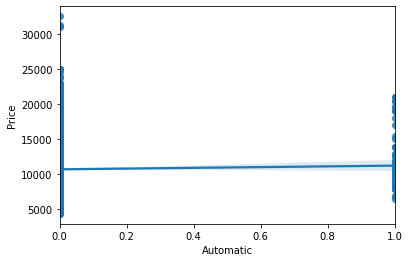

In [273]:
axes = sns.regplot(x=df.Automatic, y=df.Price)
linreg = stats.linregress(x=df.Automatic, y=df.Price)
print (linreg.slope, linreg.intercept, linreg.rvalue)

9244.961778506651 10209.346863468636 0.5882619951568354


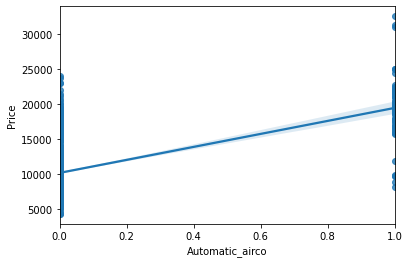

In [274]:
axes = sns.regplot(x=df.Automatic_airco, y=df.Price)
linreg = stats.linregress(x=df.Automatic_airco, y=df.Price)
print (linreg.slope, linreg.intercept, linreg.rvalue)

4222.486381234598 9807.523172905527 0.4813744379425202


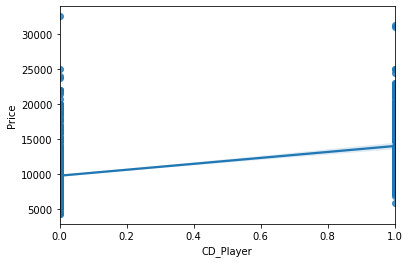

In [275]:
axes = sns.regplot(x=df.CD_Player, y=df.Price)
linreg = stats.linregress(x=df.CD_Player, y=df.Price)
print (linreg.slope, linreg.intercept, linreg.rvalue)

2605.350346629164 9266.675675675671 0.3565182258092452


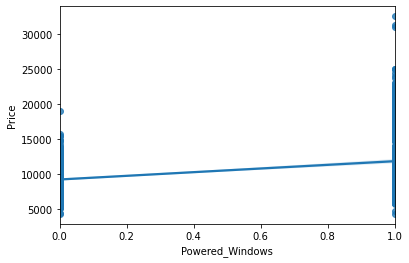

In [276]:
axes = sns.regplot(x=df.Powered_Windows, y=df.Price)
linreg = stats.linregress(x=df.Powered_Windows, y=df.Price)
print (linreg.slope, linreg.intercept, linreg.rvalue)

-1395.175431345967 11118.481195756991 -0.17236860245005062


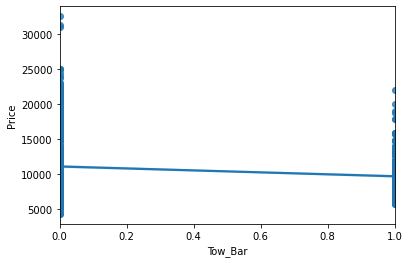

In [277]:
axes = sns.regplot(x=df.Tow_Bar, y=df.Price)
linreg = stats.linregress(x=df.Tow_Bar, y=df.Price)
print (linreg.slope, linreg.intercept, linreg.rvalue)

### 5 predictors I chose to get rid of

I got rid of Automatic, because it goes from 0 to 1, and has the lowest rvalue.

I got rid of Automatic_Airco because it seems like just a add-on. Eventhough it has a high rvalue, Airco comes before Automatic Airco, so for that reason I got rid of automatic airco but kept the normal airco.

I got rid of CD player because of a similar reason. Not all cars even these days have a cd player. Mine has just a audiojack and radio, no CD player. And the graph went from 0 to 1 so I got rid of it.

I got rid of Powered Windows because of the same reason of CD player. Eventhough the rvalue is there, I just think that the other attributes or predictors have more value when determining price in a newer car market.

I got rid of Tow bar, because it goes from 0 to 1, and it has negative rvalue. I know there was another attribute with a negative rvalue, but some people are emotionally attached to things like these. I got rid of this one over the other because this graph looked worse.

In the end the 5 that I chose probably weren't the best ones to choose based on the correlation. But as new cars are coming out in this day of age, I think these can have higher correlation than some of the others shown from the data.

In [278]:
df_enc1 = df_enc.copy()
pred1 = ['Age_08_04', 'KM', 'Fuel_Type','HP', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Sport_Model']
X1 = df_enc1[pred1]
Y1 = df_enc1[['Price']]

# regression
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)
#R-stat = R^2
rsqr = regr.score(X1, Y1).round(3)
print(rsqr)

0.85


So it turns out that the Predictors I chose to get rid of actually decreased the R^2 value. Which is not what you would be looking for if you wanted the price to keep rising. But this shows that we can still determine which predictors would end up raising the R^2 value.

In [279]:
# PCA
df_enc2 = df_enc.copy()
from sklearn.decomposition import PCA
X = df_enc2[pred]
Y = df_enc2[['Price']]

i=2
pca = PCA(n_components=i)
tdf = pd.DataFrame(pca.fit_transform(X), columns = ['Age_08_04', 'KM'])

regr = linear_model.LinearRegression()
regr.fit(tdf, Y)

rsqr = regr.score(tdf, Y).round(3)
print(rsqr)

0.505


In [280]:
# PCA
df_enc2 = df_enc.copy()
from sklearn.decomposition import PCA
X = df_enc2[pred]
Y = df_enc2[['Price']]

i=3
pca = PCA(n_components=i)
tdf = pd.DataFrame(pca.fit_transform(X), columns = ['Age_08_04', 'KM', 'Fuel_Type'])

regr = linear_model.LinearRegression()
regr.fit(tdf, Y)

rsqr = regr.score(tdf, Y).round(4)
print(rsqr)

0.8277


In [281]:
# PCA
df_enc2 = df_enc.copy()
from sklearn.decomposition import PCA
X = df_enc2[pred]
Y = df_enc2[['Price']]

i=4
pca = PCA(n_components=i)
tdf = pd.DataFrame(pca.fit_transform(X), columns = ['Age_08_04', 'KM', 'Fuel_Type','HP'])

regr = linear_model.LinearRegression()
regr.fit(tdf, Y)

rsqr = regr.score(tdf, Y).round(4)
print(rsqr)

0.8377


In [282]:
# PCA
df_enc2 = df_enc.copy()
from sklearn.decomposition import PCA
X = df_enc2[pred]
Y = df_enc2[['Price']]

i=5
pca = PCA(n_components=i)
tdf = pd.DataFrame(pca.fit_transform(X), columns = ['Age_08_04', 'KM', 'Fuel_Type','HP', 'Doors'])

regr = linear_model.LinearRegression()
regr.fit(tdf, Y)

rsqr = regr.score(tdf, Y).round(4)
print(rsqr)

0.8383


In [283]:
# PCA
df_enc2 = df_enc.copy()
from sklearn.decomposition import PCA
X = df_enc2[pred]
Y = df_enc2[['Price']]

i=6
pca = PCA(n_components=i)
tdf = pd.DataFrame(pca.fit_transform(X), columns = ['Age_08_04', 'KM', 'Fuel_Type','HP', 'Doors', 'Quarterly_Tax'])

regr = linear_model.LinearRegression()
regr.fit(tdf, Y)

rsqr = regr.score(tdf, Y).round(4)
print(rsqr)

0.8393


In [284]:
# PCA
df_enc2 = df_enc.copy()
from sklearn.decomposition import PCA
X = df_enc2[pred]
Y = df_enc2[['Price']]

i=7
pca = PCA(n_components=i)
tdf = pd.DataFrame(pca.fit_transform(X), columns = ['Age_08_04', 'KM', 'Fuel_Type','HP', 'Doors', 'Quarterly_Tax',
                                                    'Mfr_Guarantee'])

regr = linear_model.LinearRegression()
regr.fit(tdf, Y)

rsqr = regr.score(tdf, Y).round(4)
print(rsqr)

0.8439


In [285]:
# PCA
df_enc2 = df_enc.copy()
from sklearn.decomposition import PCA
X = df_enc2[pred]
Y = df_enc2[['Price']]

i=8
pca = PCA(n_components=i)
tdf = pd.DataFrame(pca.fit_transform(X), columns = ['Age_08_04', 'KM', 'Fuel_Type','HP', 'Doors', 'Quarterly_Tax',
                                                    'Mfr_Guarantee', 'Guarantee_Period'])

regr = linear_model.LinearRegression()
regr.fit(tdf, Y)

rsqr = regr.score(tdf, Y).round(4)
print(rsqr)

0.8455


In [286]:
# PCA
df_enc2 = df_enc.copy()
from sklearn.decomposition import PCA
X = df_enc2[pred]
Y = df_enc2[['Price']]

i=9
pca = PCA(n_components=i)
tdf = pd.DataFrame(pca.fit_transform(X), columns = ['Age_08_04', 'KM', 'Fuel_Type','HP', 'Doors', 'Quarterly_Tax',
                                                    'Mfr_Guarantee', 'Guarantee_Period','Airco'])

regr = linear_model.LinearRegression()
regr.fit(tdf, Y)

rsqr = regr.score(tdf, Y).round(4)
print(rsqr)

0.8557


In [289]:
# PCA
df_enc2 = df_enc.copy()
from sklearn.decomposition import PCA
X = df_enc2[pred]
Y = df_enc2[['Price']]

i=10
pca = PCA(n_components=i)
tdf = pd.DataFrame(pca.fit_transform(X), columns = ['Age_08_04', 'KM', 'Fuel_Type','HP', 'Doors', 'Quarterly_Tax',
                                                    'Mfr_Guarantee', 'Guarantee_Period','Airco','Automatic_airco'])

regr = linear_model.LinearRegression()
regr.fit(tdf, Y)

rsqr = regr.score(tdf, Y).round(4)
print(rsqr)
# X.shape

0.8558


In [288]:
# PCA
df_enc2 = df_enc.copy()
from sklearn.decomposition import PCA
X = df_enc2[pred]
Y = df_enc2[['Price']]

i=11
pca = PCA(n_components=i)
tdf = pd.DataFrame(pca.fit_transform(X), columns = ['Age_08_04', 'KM', 'Fuel_Type','HP', 'Doors', 'Quarterly_Tax',
                                                    'Mfr_Guarantee', 'Guarantee_Period','Airco','Automatic_airco',
                                                    'CD_Player'])

regr = linear_model.LinearRegression()
regr.fit(tdf, Y)

rsqr = regr.score(tdf, Y).round(4)
print(rsqr)

0.8567


In [290]:
# PCA
df_enc2 = df_enc.copy()
from sklearn.decomposition import PCA
X = df_enc2[pred]
Y = df_enc2[['Price']]

i=12
pca = PCA(n_components=i)
tdf = pd.DataFrame(pca.fit_transform(X), columns = ['Age_08_04', 'KM', 'Fuel_Type','HP', 'Doors', 'Quarterly_Tax',
                                                    'Mfr_Guarantee', 'Guarantee_Period','Airco','Automatic_airco',
                                                    'CD_Player', 'Powered_Windows'])

regr = linear_model.LinearRegression()
regr.fit(tdf, Y)

rsqr = regr.score(tdf, Y).round(4)
print(rsqr)

0.857
